In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

604

In [6]:
# Import the requests library.
import requests
# Import the datetime module from the datetime library.
from datetime import datetime

# Import the API key.
from config import weather_api_key

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=90ff24e6baf8056be4dc85dd0908e927


In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1


# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | formosa do rio preto
Processing Record 2 of Set 1 | isangel
Processing Record 3 of Set 1 | maneadero
Processing Record 4 of Set 1 | bethel
Processing Record 5 of Set 1 | new norfolk
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | karamea
City not found. Skipping...
Processing Record 8 of Set 1 | lata
Processing Record 9 of Set 1 | bluff
Processing Record 10 of Set 1 | muriti
Processing Record 11 of Set 1 | sao geraldo do araguaia
Processing Record 12 of Set 1 | nikolskoye
Processing Record 13 of Set 1 | tasiilaq
Processing Record 14 of Set 1 | kathu
Processing Record 15 of Set 1 | barcelos
Processing Record 16 of Set 1 | ribeira grande
Processing Record 17 of Set 1 | arraial do cabo
Processing Record 18 of Set 1 | bolshaya vishera
City not found. Skipping...
Processing Record 19 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 20 of Set 1 | torbay
Proc

Processing Record 38 of Set 4 | taksimo
Processing Record 39 of Set 4 | los llanos de aridane
Processing Record 40 of Set 4 | portales
Processing Record 41 of Set 4 | te anau
Processing Record 42 of Set 4 | cam ranh
Processing Record 43 of Set 4 | belaya gora
Processing Record 44 of Set 4 | rajapur
Processing Record 45 of Set 4 | berlevag
Processing Record 46 of Set 4 | onitsha
Processing Record 47 of Set 4 | saleaula
City not found. Skipping...
Processing Record 48 of Set 4 | san pedro
Processing Record 49 of Set 4 | darhan
Processing Record 50 of Set 4 | geraldton
Processing Record 1 of Set 5 | alotau
City not found. Skipping...
Processing Record 2 of Set 5 | kushmurun
Processing Record 3 of Set 5 | bolungarvik
City not found. Skipping...
Processing Record 4 of Set 5 | guerrero negro
Processing Record 5 of Set 5 | saint-georges
Processing Record 6 of Set 5 | palabuhanratu
City not found. Skipping...
Processing Record 7 of Set 5 | sao filipe
Processing Record 8 of Set 5 | klaksvik
Pro

Processing Record 24 of Set 8 | halalo
City not found. Skipping...
Processing Record 25 of Set 8 | zemio
Processing Record 26 of Set 8 | smithers
Processing Record 27 of Set 8 | sao luis
Processing Record 28 of Set 8 | hurghada
Processing Record 29 of Set 8 | richards bay
Processing Record 30 of Set 8 | margherita
Processing Record 31 of Set 8 | la massana
Processing Record 32 of Set 8 | faya
Processing Record 33 of Set 8 | reconquista
Processing Record 34 of Set 8 | mountain home
Processing Record 35 of Set 8 | am timan
Processing Record 36 of Set 8 | belmonte
Processing Record 37 of Set 8 | esperance
Processing Record 38 of Set 8 | kuopio
Processing Record 39 of Set 8 | plouzane
Processing Record 40 of Set 8 | nanortalik
Processing Record 41 of Set 8 | havre-saint-pierre
Processing Record 42 of Set 8 | sorkjosen
Processing Record 43 of Set 8 | gornozavodsk
Processing Record 44 of Set 8 | benghazi
Processing Record 45 of Set 8 | ancud
Processing Record 46 of Set 8 | aranos
Processing 

Processing Record 13 of Set 12 | saldanha
Processing Record 14 of Set 12 | genhe
Processing Record 15 of Set 12 | ulladulla
Processing Record 16 of Set 12 | neiafu
Processing Record 17 of Set 12 | luanda
Processing Record 18 of Set 12 | kenai
Processing Record 19 of Set 12 | lisala
Processing Record 20 of Set 12 | denpasar
Processing Record 21 of Set 12 | celestun
Processing Record 22 of Set 12 | abrau-dyurso
Processing Record 23 of Set 12 | ochakiv
Processing Record 24 of Set 12 | pontian kecil
Processing Record 25 of Set 12 | boyuibe
Processing Record 26 of Set 12 | malakal
Processing Record 27 of Set 12 | gao
Processing Record 28 of Set 12 | karamay
City not found. Skipping...
Processing Record 29 of Set 12 | shipitsyno
Processing Record 30 of Set 12 | bacuit
City not found. Skipping...
Processing Record 31 of Set 12 | hella
Processing Record 32 of Set 12 | nhulunbuy
Processing Record 33 of Set 12 | paradwip
City not found. Skipping...
Processing Record 34 of Set 12 | santa maria
Pr

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Formosa Do Rio Preto,-11.0483,-45.1931,92.80,20,0,3.62,BR,2021-07-28 14:51:02
1,Isangel,-19.5500,169.2667,69.51,67,20,12.50,VU,2021-07-28 14:51:03
2,Maneadero,31.7167,-116.5667,67.10,92,2,1.99,MX,2021-07-28 14:51:03
3,Bethel,41.3712,-73.4140,76.28,73,40,3.00,US,2021-07-28 14:51:03
4,New Norfolk,-42.7826,147.0587,44.10,78,57,1.01,AU,2021-07-28 14:51:04
5,Vaini,-21.2000,-175.2000,68.16,83,20,8.05,TO,2021-07-28 14:51:04
6,Lata,40.1629,-8.3327,92.05,34,0,13.11,PT,2021-07-28 14:51:04
7,Bluff,-46.6000,168.3333,45.81,87,48,8.32,NZ,2021-07-28 14:51:05
8,Muriti,-1.9833,32.9167,76.59,46,54,2.62,TZ,2021-07-28 14:51:05
9,Sao Geraldo Do Araguaia,-6.4006,-48.5550,96.94,21,0,5.28,BR,2021-07-28 14:51:06


In [9]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Formosa Do Rio Preto,BR,2021-07-28 14:51:02,-11.0483,-45.1931,92.80,20,0,3.62
1,Isangel,VU,2021-07-28 14:51:03,-19.5500,169.2667,69.51,67,20,12.50
2,Maneadero,MX,2021-07-28 14:51:03,31.7167,-116.5667,67.10,92,2,1.99
3,Bethel,US,2021-07-28 14:51:03,41.3712,-73.4140,76.28,73,40,3.00
4,New Norfolk,AU,2021-07-28 14:51:04,-42.7826,147.0587,44.10,78,57,1.01
...,...,...,...,...,...,...,...,...,...
547,Salamiyah,SY,2021-07-28 14:54:04,35.0113,37.0532,96.40,14,0,19.93
548,Wasilla,US,2021-07-28 14:54:04,61.5814,-149.4394,58.42,91,90,0.00
549,Dubuque,US,2021-07-28 14:54:04,42.4833,-90.8668,83.55,75,91,5.50
550,Roma,US,2021-07-28 14:50:03,43.2128,-75.4557,70.39,74,75,3.44


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

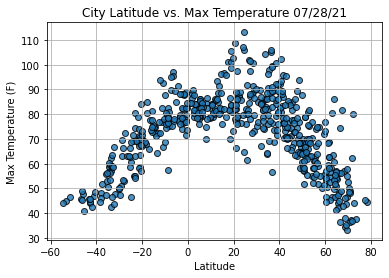

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

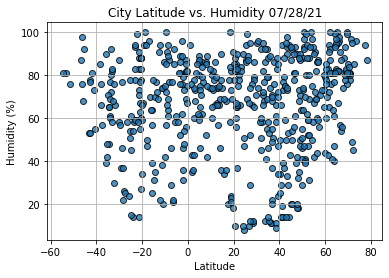

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

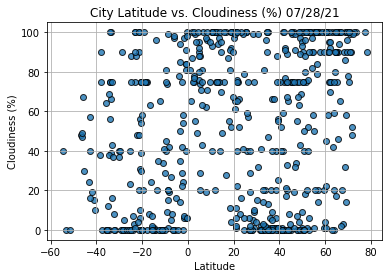

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

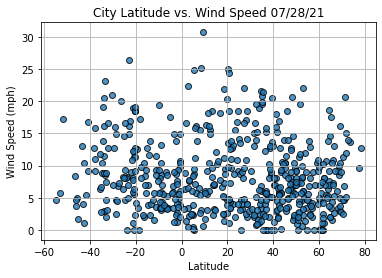

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [116]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.title(title)
    plt.show()

In [117]:
index13 = city_data_df.loc[13]
index13

City                     Barcelos
Country                        PT
Date          2021-07-28 14:51:07
Lat                       41.5388
Lng                       -8.6151
Max Temp                    86.92
Humidity                       39
Cloudiness                      0
Wind Speed                  15.23
Name: 13, dtype: object

In [118]:
city_data_df["Lat"] >= 0

0      False
1      False
2       True
3       True
4      False
       ...  
547     True
548     True
549     True
550     True
551    False
Name: Lat, Length: 552, dtype: bool

In [119]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Maneadero,MX,2021-07-28 14:51:03,31.7167,-116.5667,67.10,92,2,1.99
3,Bethel,US,2021-07-28 14:51:03,41.3712,-73.4140,76.28,73,40,3.00
6,Lata,PT,2021-07-28 14:51:04,40.1629,-8.3327,92.05,34,0,13.11
10,Nikolskoye,RU,2021-07-28 14:51:06,59.7035,30.7861,76.89,79,100,4.09
11,Tasiilaq,GL,2021-07-28 14:51:06,65.6145,-37.6368,44.20,67,90,1.61
...,...,...,...,...,...,...,...,...,...
544,Gambela,ET,2021-07-28 14:54:03,8.2500,34.5833,77.90,89,100,2.59
547,Salamiyah,SY,2021-07-28 14:54:04,35.0113,37.0532,96.40,14,0,19.93
548,Wasilla,US,2021-07-28 14:54:04,61.5814,-149.4394,58.42,91,90,0.00
549,Dubuque,US,2021-07-28 14:54:04,42.4833,-90.8668,83.55,75,91,5.50


In [120]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Maneadero,MX,2021-07-28 14:51:03,31.7167,-116.5667,67.10,92,2,1.99
3,Bethel,US,2021-07-28 14:51:03,41.3712,-73.4140,76.28,73,40,3.00
6,Lata,PT,2021-07-28 14:51:04,40.1629,-8.3327,92.05,34,0,13.11
10,Nikolskoye,RU,2021-07-28 14:51:06,59.7035,30.7861,76.89,79,100,4.09
11,Tasiilaq,GL,2021-07-28 14:51:06,65.6145,-37.6368,44.20,67,90,1.61


In [121]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

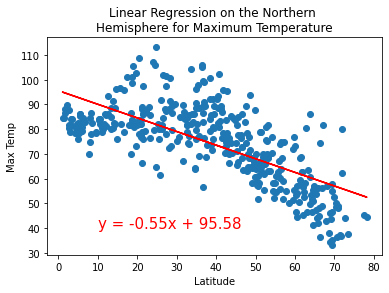

In [131]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values, "Linear Regression on the Northern \nHemisphere for Maximum Temperature", "Max Temp",(10,40))

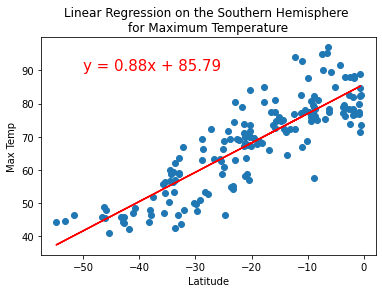

In [132]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Maximum Temperature', 'Max Temp',(-50,90))

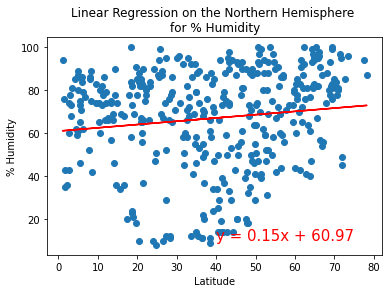

In [133]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Humidity', '% Humidity',(40,10))

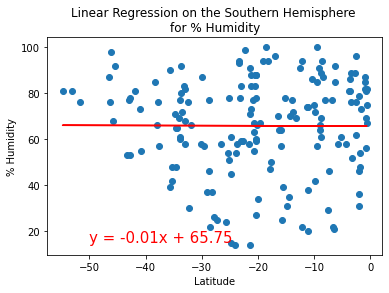

In [134]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Humidity', '% Humidity',(-50,15))

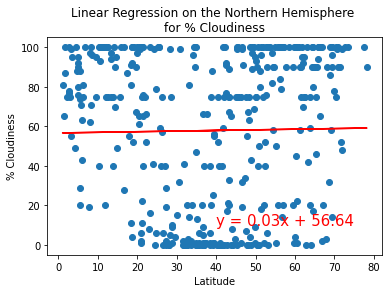

In [136]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \nfor % Cloudiness', '% Cloudiness',(40,10))

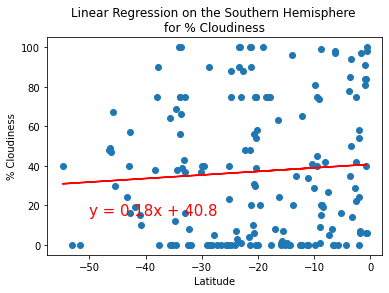

In [137]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor % Cloudiness', '% Cloudiness',(-50,15))

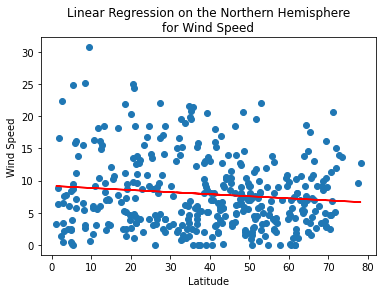

In [140]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere\nfor Wind Speed', 'Wind Speed',(40,35))

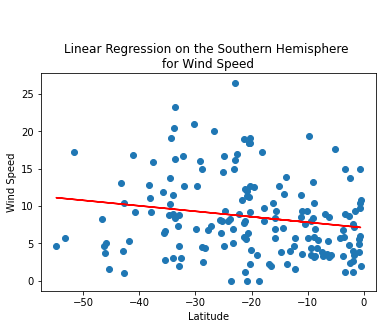

In [141]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \nfor Wind Speed', 'Wind Speed',(-50,35))